In [579]:
import sys
import tensorflow as tf 
import pandas as pd 
import numpy as np 
import os
import matplotlib
import matplotlib.pyplot as plt 
import random
import shutil
import tensorflow.contrib.learn as tflearn
import tensorflow.contrib.layers as tflayers
from tensorflow.contrib.learn.python.learn import learn_runner
import tensorflow.contrib.metrics as metrics 
from tensorflow.contrib import rnn
from sklearn.utils import shuffle
from __future__ import division

In [580]:
data = 'Data/Method 1 Upsampled/toRNN_Individual/data.csv'

In [581]:
print('Reading CSV Data...')
df = pd.read_csv(data)

#Create a new feature for normal (non-fraudulent) transactions.
df.loc[df.label == 0, 'Slip'] = 1
df.loc[df.label == 1, 'Slip'] = 0


#Rename 'Class' to 'Fraud'.
df = df.rename(columns={'label': 'Stable'})

df.Slip = df.Slip.astype(int)
df.Stable = df.Stable.astype(int)


Slip = df[df.Slip == 1]
Stable = df[df.Stable == 1]

#Equal number of Stable and Unstable class examples
Stable = Stable.iloc[0:Slip.iloc[:,1].count(), :]

print ('Number of Stable class examples: ', Stable.iloc[:,1].count())
print ('Numbuer of Unstable class examples: ', Slip.iloc[:,1].count())

Reading CSV Data...
('Number of Stable class examples: ', 2875)
('Numbuer of Unstable class examples: ', 2875)


In [582]:

# Add 80% of the slip transactions to X_train.
X_train = Slip.sample(frac=0.8)
count_Slip = len(X_train)

# Add 80% of the stable transactions to X_train.
X_train = pd.concat([X_train, Stable.sample(frac = 0.8)], axis = 0)

# X_test contains all the transaction not in X_train.
X_test = df.loc[~df.index.isin(X_train.index)]

# Shuffle the dataframes so that the training is done in a random order.
#X_train = shuffle(X_train)
#X_test = shuffle(X_test)

X_train = X_train.iloc[0:48600, :]
X_test = X_test.iloc[0:12150, :]


print ('Length of train set', len(X_train))
print ('Length of test set', len (X_test))



('Length of train set', 4600)
('Length of test set', 12150)


In [583]:
# Add our target features to y_train and y_test.

#df.loc[df.label == 0, 'Slip'] = 1

y_train = pd.concat([X_train.Slip, X_train.Stable], axis=1)
y_test = pd.concat([X_test.Slip, X_test.Stable], axis=1)

# Drop target features from X_train and X_test.
X_train = X_train.drop(['Slip', 'Stable'], axis = 1)
X_test = X_test.drop(['Slip', 'Stable'], axis = 1)


# Check to ensure all of the training/testing dataframes are of the correct length



In [584]:
def plot(loss_list, accuracy_list):
    plt.subplot(2, 3, 1)
    plt.cla()
    plt.plot(loss_list)
    plt.plot(accuracy_list)
    
    #for batch_series_idx in range(batch_size):
        #one_hot_output_series = np.array(predictions_series)[:, batch_series_idx, :]
        #single_output_series = np.array([(1 if out[0] < 0.5 else 0) for out in one_hot_output_series])

        #plt.subplot(2, 3, batch_series_idx + 2)
        #plt.cla()
        #plt.axis([0, truncated_backprop_length, 0, 2])
        #left_offset = range(truncated_backprop_length)
        #plt.bar(left_offset, batchX[batch_series_idx, :], width=1, color="blue")
        #plt.bar(left_offset, batchY[batch_series_idx, :] * 0.5, width=1, color="red")
        #plt.bar(left_offset, single_output_series * 0.3, width=1, color="green")

    plt.draw()
    plt.pause(0.0001)



In [661]:
tf.reset_default_graph()

#unrolled features
time_steps = 3 #49
#LSTM units - features 
num_units=10
#number of exmples in batch
n_input=X_train.columns.size
#learning rate for adam
learning_rate=0.001
n_classes=2
#size of batch
batch_size=30
#truncated_backprop_length = 15
total_series_length = len(X_train)


num_batches = X_train.index.size//batch_size//n_input
print(num_batches)

3


In [662]:
#weights and biases of appropriate shape to accomplish above task
out_weights=tf.Variable(tf.random_normal([num_units,n_classes]))
out_bias=tf.Variable(tf.random_normal([n_classes]))

#defining placeholders
batchX_placeholder=tf.placeholder("float",[None,n_input])
#input label placeholder
batchY_placeholder=tf.placeholder("float",[None,n_classes])


In [663]:
#processing the input tensor from [batch_size,n_steps,n_input] to "time_steps" number of [batch_size,n_input] tensors
#input=tf.unstack(batchX_placeholder ,batch_size, 1)

In [664]:
#defining the network
lstm_layer=rnn.BasicLSTMCell(num_units,forget_bias=1)
outputs,_=rnn.static_rnn(lstm_layer,[batchX_placeholder],dtype="float32")

In [665]:
#converting last output of dimension [batch_size,num_units] to [batch_size,n_classes] by out_weight multiplication
prediction=tf.matmul(outputs[-1],out_weights)+out_bias


In [666]:
#tf.reset_default_graph()

#loss_function
#loss = -tf.reduce_sum(batchY_placeholder * tf.log(prediction))
loss=tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=prediction,labels=batchY_placeholder))
output = tf.cast(prediction, tf.float32)
labels = tf.cast(batchY_placeholder, tf.float32)


#optimization
opt=tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(loss)

#model evaluation
correct_prediction=tf.equal(tf.argmax(prediction,1),tf.argmax(batchY_placeholder,1))
accuracy=tf.reduce_mean(tf.cast(correct_prediction,tf.float32))


2500
2500
2500
2500
2500
2500
2500
2500
2500
2500
2500
2500
2500
2500
2500
2500
2500
2500
2500
2500
2500
2500
2500
2500
2500
2500
2500
2500
2500
2500
('For iter ', 10)
('Training Accuracy ', 1.0)
('Training Loss ', 0.20337644)
__________________
2500
2500
2500
2500
2500
2500
2500
2500
2500
2500
2500
2500
2500
2500
2500
2500
2500
2500
2500
2500
2500
2500
2500
2500
2500
2500
2500
2500
2500
2500
('For iter ', 20)
('Training Accuracy ', 1.0)
('Training Loss ', 0.17209759)
__________________
2500
2500
2500
2500
2500
2500
2500
2500
2500
2500
2500
2500
2500
2500
2500
2500
2500
2500
2500
2500
2500
2500
2500
2500
2500
2500
2500
2500
2500
2500
('For iter ', 30)
('Training Accuracy ', 1.0)
('Training Loss ', 0.14714909)
__________________
2500
2500
2500
2500
2500
2500
2500
2500
2500
2500
2500
2500
2500
2500
2500
2500
2500
2500
2500
2500
2500
2500
2500
2500
2500
2500
2500
2500
2500
2500
('For iter ', 40)
('Training Accuracy ', 1.0)
('Training Loss ', 0.12709193)
__________________
2500
2500
2500
2

2500
2500
2500
2500
2500
2500
2500
2500
2500
2500
2500
2500
2500
('For iter ', 360)
('Training Accuracy ', 1.0)
('Training Loss ', 0.012177053)
__________________
2500
2500
2500
2500
2500
2500
2500
2500
2500
2500
2500
2500
2500
2500
2500
2500
2500
2500
2500
2500
2500
2500
2500
2500
2500
2500
2500
2500
2500
2500
('For iter ', 370)
('Training Accuracy ', 1.0)
('Training Loss ', 0.011674536)
__________________
2500
2500
2500
2500
2500
2500
2500
2500
2500
2500
2500
2500
2500
2500
2500
2500
2500
2500
2500
2500
2500
2500
2500
2500
2500
2500
2500
2500
2500
2500
('For iter ', 380)
('Training Accuracy ', 1.0)
('Training Loss ', 0.011202179)
__________________
2500
2500
2500
2500
2500
2500
2500
2500
2500
2500
2500
2500
2500
2500
2500
2500
2500
2500
2500
2500
2500
2500
2500
2500
2500
2500
2500
2500
2500
2500
('For iter ', 390)
('Training Accuracy ', 1.0)
('Training Loss ', 0.010757549)
__________________
2500
2500
2500
2500
2500
2500
2500
2500
2500
2500
2500
2500
2500
2500
2500
2500
2500
2500
250

2500
2500
2500
2500
2500
2500
2500
2500
2500
2500
2500
2500
2500
2500
2500
2500
2500
2500
2500
2500
2500
('For iter ', 720)
('Training Accuracy ', 1.0)
('Training Loss ', 0.0037877259)
__________________
2500
2500
2500
2500
2500
2500
2500
2500
2500
2500
2500
2500
2500
2500
2500
2500
2500
2500
2500
2500
2500
2500
2500
2500
2500
2500
2500
2500
2500
2500
('For iter ', 730)
('Training Accuracy ', 1.0)
('Training Loss ', 0.0036914083)
__________________
2500
2500
2500
2500
2500
2500
2500
2500
2500
2500
2500
2500
2500
2500
2500
2500
2500
2500
2500
2500
2500
2500
2500
2500
2500
2500
2500
2500
2500
2500
('For iter ', 740)
('Training Accuracy ', 1.0)
('Training Loss ', 0.0035984069)
__________________
2500
2500
2500
2500
2500
2500
2500
2500
2500
2500
2500
2500
2500
2500
2500
2500
2500
2500
2500
2500
2500
2500
2500
2500
2500
2500
2500
2500
2500
2500
('For iter ', 750)
('Training Accuracy ', 1.0)
('Training Loss ', 0.0035084856)
__________________
2500
2500
2500
2500
2500
2500
2500
2500
2500
2500

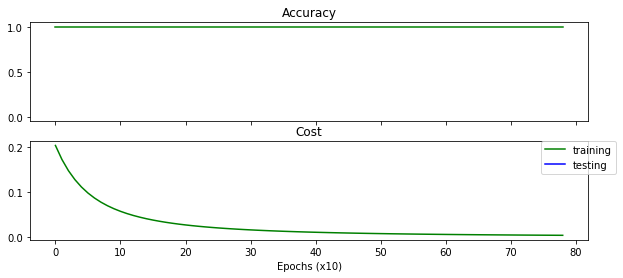

In [671]:
#from tensorflow.examples.tutorials.mnist import input_data
#mnist=input_data.read_data_sets("/tmp/data/",one_hot=True)

#initialize variables

init=tf.global_variables_initializer()
with tf.Session() as sess:
    
    sess.run(init)
    #plt.ion()
    #plt.figure()
    #plt.show()
    loss_list = []
    acc_list = []
    test_loss_list = []
    test_acc_list = []
    iter=1
    while iter<800:
        
        for batch_idx in range(num_batches):
            
            #indexes for data
            start_idx = batch_idx * n_input 
            end_idx = start_idx + n_input 
            batch_x = X_train.iloc[start_idx:end_idx, :]
            #batch_x = np.array(batch_x)
            #print (batch_x)
            #batch_x=batch_x.reshape((batch_size, -1, n_input))
            #print (batch_x)
            #list_batch_x = list(batch_x.itertuples(index=False))
            #batch_x = (batch_idx,list_batch_x)

            
            #TODO: replace with previous value
            #batch_x[np.isnan(batch_x)] = 0

            #indexes for labels
            start_idx = batch_idx * n_input 
            end_idx = start_idx + n_input
            batch_y = y_train.iloc[start_idx:end_idx, :]
            #list_batch_y = list(batch_y.itertuples(index=False))
            #batch_y = (batch_idx,list_batch_y)
            #print ((batch_x.size))
            #print (len(batch_y.columns ))

            sess.run(opt, feed_dict={batchX_placeholder: batch_x, 
                                         batchY_placeholder: batch_y})
            
            
            
        if iter %10==0:

            los=sess.run(loss, feed_dict={batchX_placeholder:batch_x,batchY_placeholder:batch_y})
            acc=sess.run(accuracy, feed_dict={batchX_placeholder:batch_x,batchY_placeholder:batch_y})
            
            
            loss_list.append(los)
            acc_list.append(acc)
            
            #plot(loss_list, acc_list)
            print("For iter ",iter)
            print("Training Accuracy ",acc)
            print("Training Loss ",los)
            print("__________________")

        iter=iter+1
        
        for batch_idx in range(num_batches):

            #indexes for data
            start_idx = batch_idx * batch_size 
            end_idx = start_idx + batch_size * n_input
            batch_x = X_test.iloc[start_idx:end_idx, :]
            batch_x = np.array(batch_x)
            batch_x=batch_x.reshape((batch_size,time_steps,n_input))

            batch_x[np.isnan(batch_x)] = 0

            #indexes for labels
            start_idx = batch_idx * batch_size 
            end_idx = start_idx + batch_size
            batch_y = y_test.iloc[start_idx:end_idx, :]

            test_loss=sess.run(loss, feed_dict={batchX_placeholder:batch_x,batchY_placeholder:batch_y})
            test_acc=sess.run(accuracy, feed_dict={batchX_placeholder:batch_x,batchY_placeholder:batch_y})
            test_loss_list.append(test_loss)
            test_acc_list.append(test_acc)
            #plot(loss_list, acc_list)
            print("For iter ",iter)
            print("Testing Accuracy ",test_acc)
            print("Testing Loss ",test_los)
            print("__________________")
            

            
    #test_acc = sess.run(accuracy, feed_dict={batchX_placeholder: X_train, batchY_placeholder: y_train})
    
f, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(10,4))

ax1.plot(acc_list, color = 'green',  label = 'training') # green
#ax1.plot(loss_list, color = 'orange', label = 'validation') # orange
ax1.plot(test_acc, color = 'blue', label = 'testing') # blue
ax1.set_title('Accuracy')


ax2.plot(loss_list, color = 'green',  label = 'training')
#ax2.plot(valid_cost_mean, color = 'orange', label = 'validation')
ax2.plot(test_loss_list, color = 'blue', label = 'testing') 
ax2.set_title('Cost')

plt.legend(bbox_to_anchor=(1.05, 1), loc=1, borderaxespad=0.)
plt.xlabel('Epochs (x10)')
plt.show()
